In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import math

#Generate inline plots
%matplotlib inline

deaths_rate = pd.read_csv('corona_spread.csv',parse_dates=['Deaths'])
deaths_rate.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [2]:
cases_by_country = deaths_rate.groupby(['Country'])['Confirmed'].sum().to_frame(name = 'Confirmed').reset_index()
cases_by_country.columns = ['country','confirmed']
cases_by_country.sort_values(by='confirmed', ascending=False, inplace=True)
cases_by_country.head()

,country,confirmed
174,US,57098767
85,Italy,11896347
158,Spain,11890691
178,United Kingdom,9150537
66,Germany,9046257


Text(0.5, 1.0, 'Confirmed 2019-nCoV')

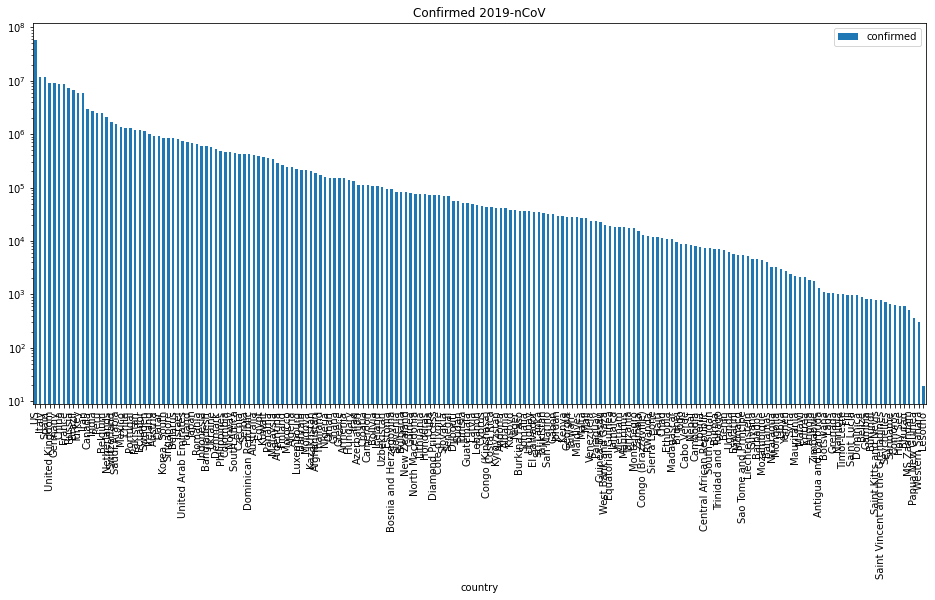

In [3]:
def location_label(row):
    if pd.isnull(row['Province/State']):
        return row['Country/Region']
    else:
        return row['Province/State']

ax = cases_by_country.plot.bar(x='country', y='confirmed', figsize=(16, 7))
ax.set_yscale('log')
ax.set_title('Confirmed 2019-nCoV')

In [5]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

def output_images():
    i = 0
    for date in date_rng:
        fig, ax = plt.subplots(figsize=(18, 6))

        world.plot(
            ax=ax,
            color = "lightslategray", 
            edgecolor = "slategray", 
            linewidth = 0.5);

        ax.axis('off')

        d = date
        ax.set_title(d.strftime("%b %d %Y"))
        day_df = build_df_for_datetime(d)
        ncov = build_ncov_geodf(day_df)

        ncov.plot(
            ax=ax, 
            column='Confirmed', 
            norm=colors.LogNorm(vmin=1, vmax=1000),
            legend=True,
            legend_kwds={'label': "Confirmed 2019-nCoV Cases"},
            cmap='OrRd')

        i += 1
        fig.savefig('./out/' + '{0:03d}'.format(i) + '.png', facecolor='slategrey', dpi=150, bbox_inches='tight')
        
#uncomment to save imaages locally
#output_images()